In [1]:
import numpy as np # used for handling numbers

In [2]:
import pandas as pd # used for handling the dataset

In [3]:
from sklearn.impute import SimpleImputer # used for handling missing data

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split # used for splitting training and testing data

In [6]:
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [7]:
import seaborn as sns

In [8]:
from scipy import stats

In [9]:
dataset = pd.read_csv('diamonds.csv') # to import the dataset

In [10]:
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
# dataset.drop(columns=['Unnamed:0'],inplace=True)
dataset.drop(columns='Unnamed: 0',inplace=True)

In [12]:
dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
dataset.isnull().sum() #find null data

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Melihat korelasi pada dataset

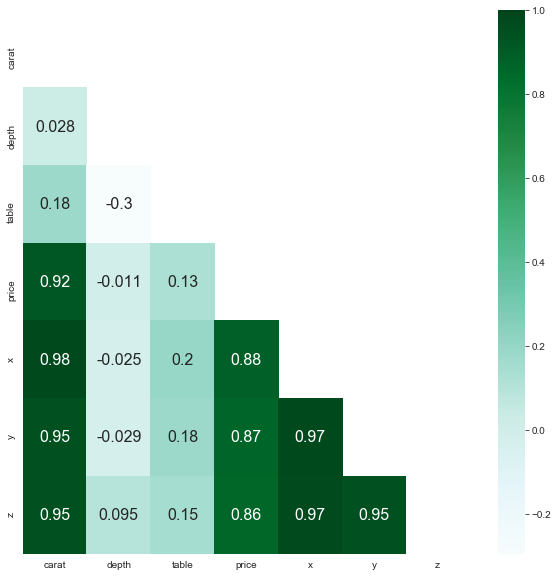

In [29]:
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
Triu = np.triu_indices_from(mask)
mask[Triu] = True
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(data=dataset.corr(),annot=True,annot_kws={"size":16},mask=mask,cmap='BuGn',linecolor='black')

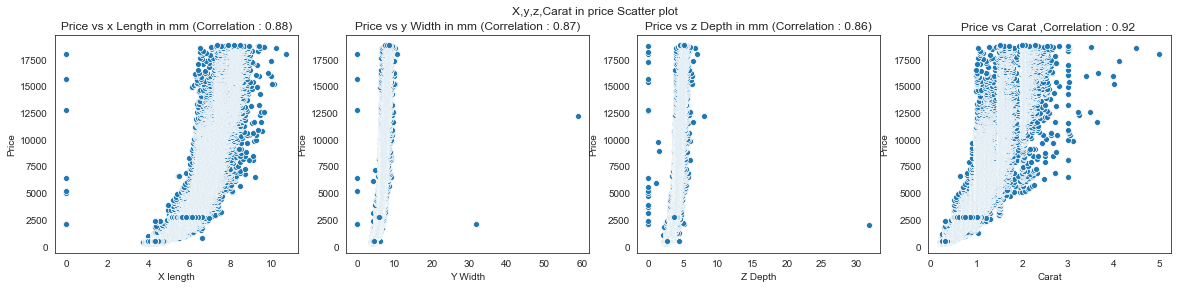

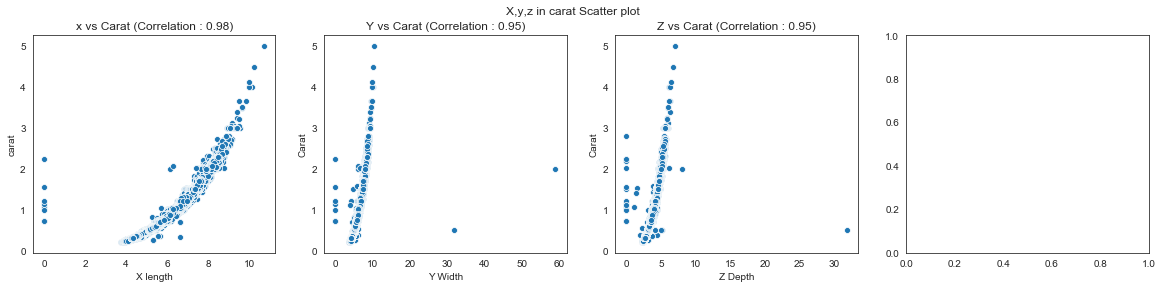

In [46]:
f,axs=plt.subplots(ncols=4,figsize=(20,4))
f.suptitle("X,y,z,Carat in price Scatter plot")
xcorr=round(dataset.price.corr(dataset.x),2)
ycorr=round(dataset.price.corr(dataset.y),2)
zcorr=round(dataset.price.corr(dataset.z),2)
caratcorr=round(dataset.price.corr(dataset.carat),2)
sns.scatterplot(x='x',y='price',data=dataset,ax=axs[0])
axs[0].set_title(f"Price vs x Length in mm (Correlation : {xcorr})")
axs[0].set(ylabel="Price",xlabel="X length")
sns.scatterplot(x='y',y='price',data=dataset,ax=axs[1])
axs[1].set_title(f"Price vs y Width in mm (Correlation : {ycorr})")
axs[1].set(ylabel="Price",xlabel="Y Width")
sns.scatterplot(x="z",y='price',data=dataset,ax=axs[2])
axs[2].set_title(f"Price vs z Depth in mm (Correlation : {zcorr})")
axs[2].set(ylabel="Price",xlabel="Z Depth")
sns.scatterplot(x="carat",y="price",data=dataset,ax=axs[3])
axs[3].set(ylabel="Price",xlabel="Carat",title=f"Price vs Carat ,Correlation : {caratcorr} ")

f,axs=plt.subplots(ncols=4,figsize=(20,4))
f.suptitle("X,y,z in carat Scatter plot")
xcorr=round(dataset.carat.corr(dataset.x),2)
ycorr=round(dataset.carat.corr(dataset.y),2)
zcorr=round(dataset.carat.corr(dataset.z),2)
sns.scatterplot(x='x',y='carat',data=dataset,ax=axs[0])
axs[0].set_title(f"x vs Carat (Correlation : {xcorr})")
axs[0].set(xlabel="X length",ylabel="carat")
sns.scatterplot(x='y',y='carat',data=dataset,ax=axs[1])
axs[1].set_title(f"Y vs Carat (Correlation : {ycorr})")
axs[1].set(xlabel="Y Width",ylabel="Carat")
sns.scatterplot(x="z",y='carat',data=dataset,ax=axs[2])
axs[2].set_title(f"Z vs Carat (Correlation : {zcorr})")
axs[2].set(xlabel="Z Depth",ylabel="Carat")

plt.show()

## Conclusion X : the higher diamonds length the more likely its price and carat getting                                          higher
## Conclusion Y : the higher diamonds width the more likely its price and carat getting higher
## Conclusion Z : the higher diamonds depth the more likely its price and carat getting higher
## Conclustion Carat : the higher diamonds carat the more expensive its

## But, we only focused in price correlation so we can ignore correlation between carat and          length, width, and depth

## First we need to clear outlier in dataset

In [57]:
# Make function to count outlier on dataset
def calculateOutlier(dataset):
    resultLower = [];
    resultUpper = [];
    for i in range(len(dataset.columns)):
        q1,q3 = np.percentile(a=pd.DataFrame(data=dataset[dataset.columns[i]]).values,q=[25,75])
        # iqrx = interquartile values
        iqrx = q3 - q1;
        lowerBound = q1 - (1.5*iqrx)
        upperBound = q3 + (1.5*iqrx)
        resultLower.append(lowerBound)
        resultUpper.append(upperBound)
    return resultLower,resultUpper

In [67]:
# Make function to clear outlier
def clearOutlier(Dataset,lowerBound,upperBound):
    for i in range(len(lower)):
        lol=pd.concat([pd.DataFrame(data=Dataset.loc[Dataset[Dataset.columns[i]].values < lower[i]][Dataset.columns[i]]),pd.DataFrame(data=Dataset.loc[Dataset[Dataset.columns[i]] .values > upper[i]][Dataset.columns[i]])],keys=Dataset.columns[i],sort=False)
        Dataset.replace(lol,value=np.nan,inplace=True)
    return dataset

In [59]:
# Make adjustmentSquared
def adjSquared(R2Value,test_x):
    row = test_x.shape[0]
    column = test_x.shape[1] -1
    return R2Value - (1-R2Value)*((row-1)/(row-column-1))

In [54]:
numericalOutlier = pd.DataFrame(data=dataset.drop(['cut','color','clarity'],axis=1))
numericalOutlier.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [68]:
lower,upper = calculateOutlier(numericalOutlier)
print('Lower : '+str(len(lower)))
print('Upper : '+str(len(upper)))

Lower : 7
Upper : 7


In [69]:
out = clearOutlier(numericalOutlier,lower,upper)
out.isnull().sum()

C:\Users\Dendy\Anaconda3\envs\tubesHPAI\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Dendy\Anaconda3\envs\tubesHPAI\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [25]:
# Get dummies
datasetnew = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)
datasetnew

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


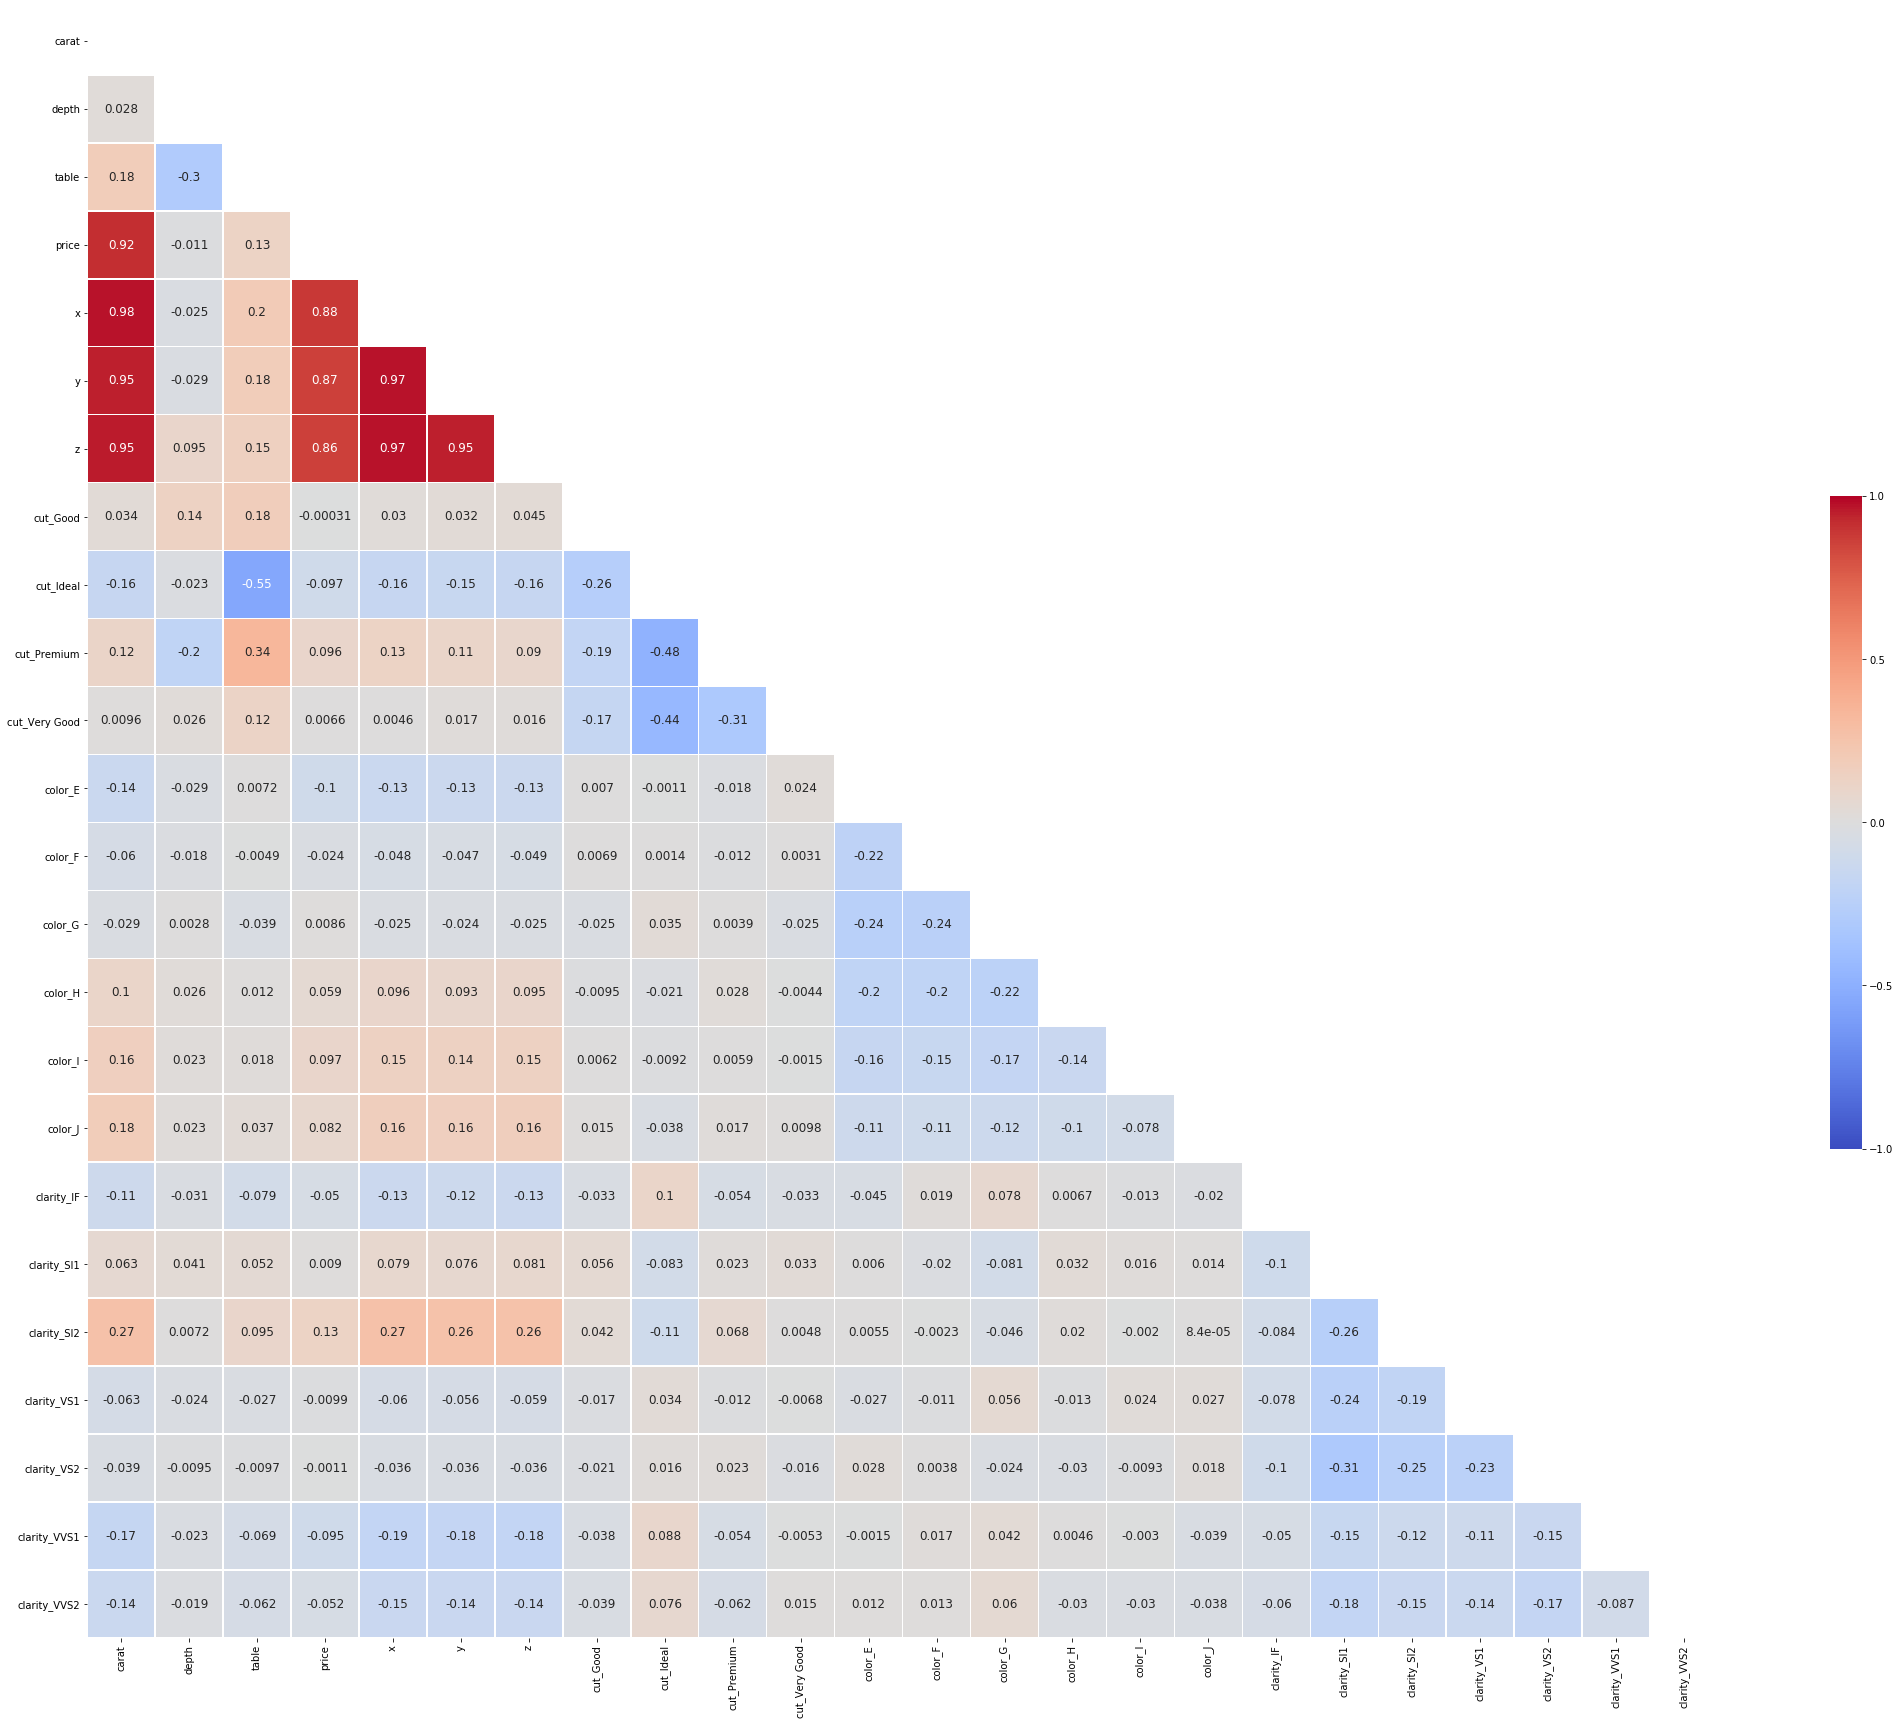

In [26]:
mask = np.zeros_like(datasetnew.corr(), dtype=np.bool)
Triu = np.triu_indices_from(mask)
mask[Triu] = True


f, ax = plt.subplots(figsize=(40, 30)) 
heatmap = sns.heatmap(datasetnew.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(datasetnew.columns, rotation = 0)
ax.set_xticklabels(datasetnew.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})